# Multiple Factor Analysis (MFA) with wine dataset

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
#changement de dossier
import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

#importation des données
import pandas as pd
url = "http://factominer.free.fr/factomethods/datasets/wine.txt"
wine = pd.read_table(url,sep="\t")

In [3]:
group_name = ["origin","odor","visual","odor.after.shaking","taste","overall"]
group = [2,5,3,10,9,2]
num_group_sup = [0,5]

In [4]:
from scientisttools import MFA

res_mfa = MFA(n_components=5,group=group,group_type=["n"]+["s"]*5,var_weights_mfa=None,
              name_group = group_name,num_group_sup=[0,5],parallelize=True)
res_mfa.fit(wine)

MFA(group=[2, 5, 3, 10, 9, 2], group_type=['n', 's', 's', 's', 's', 's'],
    name_group=['origin', 'odor', 'visual', 'odor.after.shaking', 'taste',
                'overall'],
    num_group_sup=[0, 5], parallelize=True)

## Eigenvalues

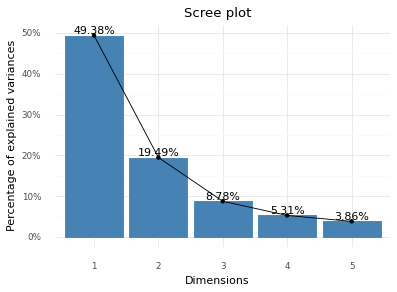

In [5]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_mfa,add_labels=True)
print(p)

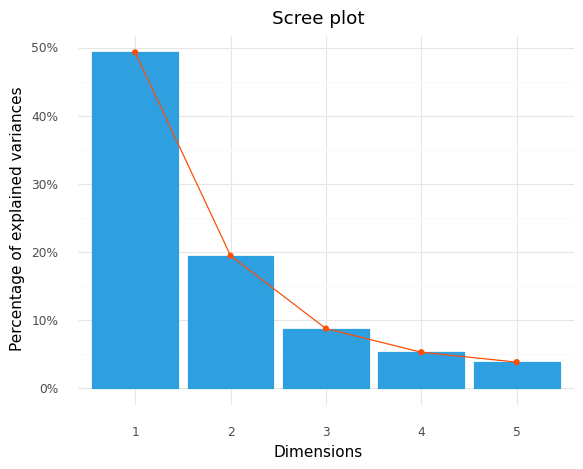

In [6]:
p = fviz_screeplot(res_mfa,line_color = "#FC4E07",bar_color = "#2E9FDF", bar_fill = "#2E9FDF")
print(p)

## Individuals Factor Map

### Color by RGB color

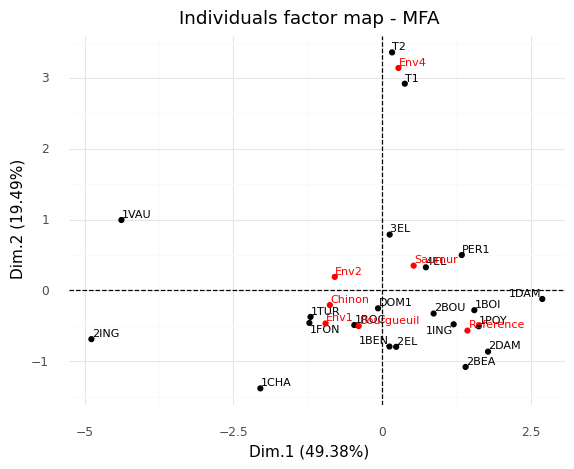

In [7]:
from scientisttools import fviz_mfa_ind
p = fviz_mfa_ind(res_mfa,repel=True,ind_sup=False)
print(p)

### Color by cos2

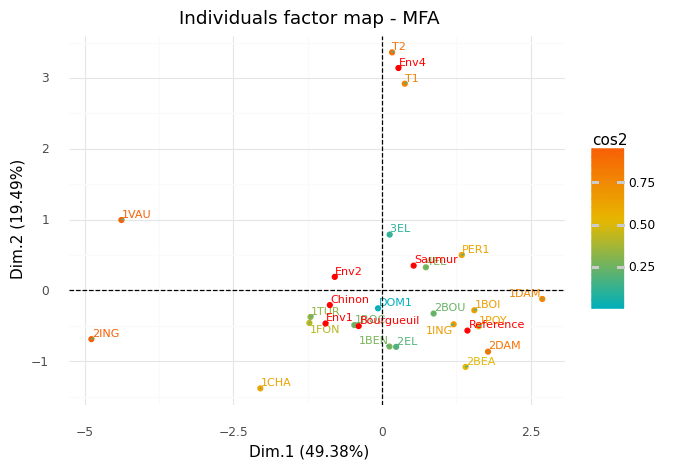

In [8]:
p = fviz_mfa_ind(res_mfa,color="cos2",repel=True,ind_sup=False)
print(p)

### Color by contrib

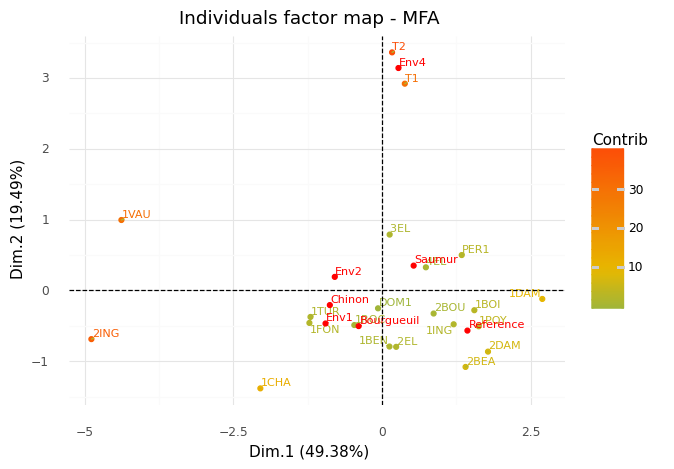

In [9]:
p = fviz_mfa_ind(res_mfa,color="contrib",repel=True,ind_sup=False)
print(p)

### Color by actives quantitatives variables

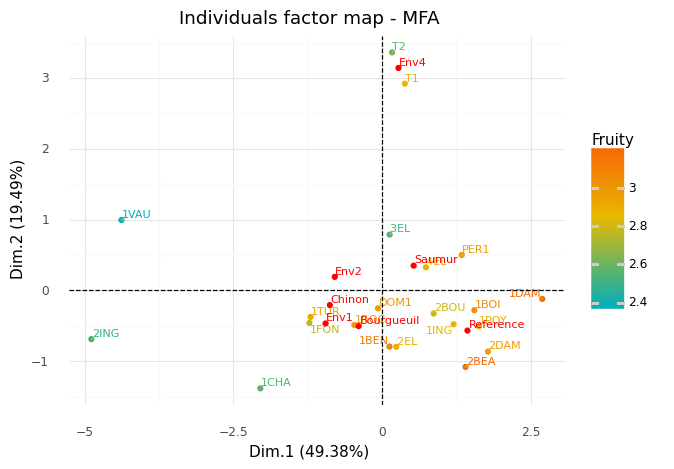

In [10]:
p = fviz_mfa_ind(res_mfa,color="Fruity",repel=True,ind_sup=False)
print(p)

### Color by supplementary quantitatives variables

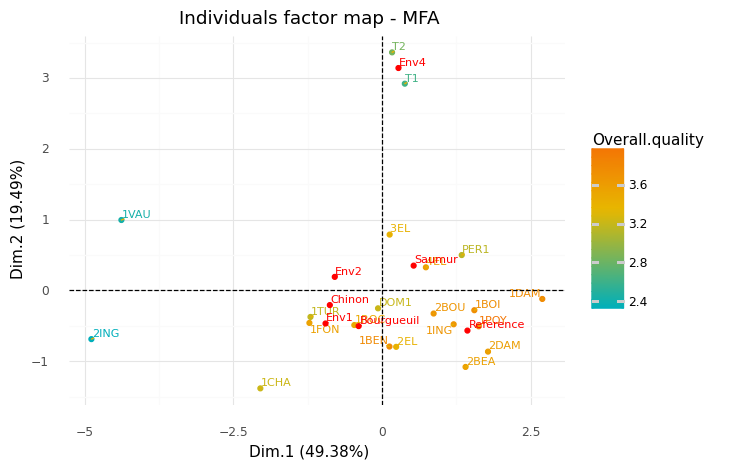

In [11]:
p = fviz_mfa_ind(res_mfa,color="Overall.quality",repel=True,ind_sup=False)
print(p)

### Color by supplementary qualitatives variables

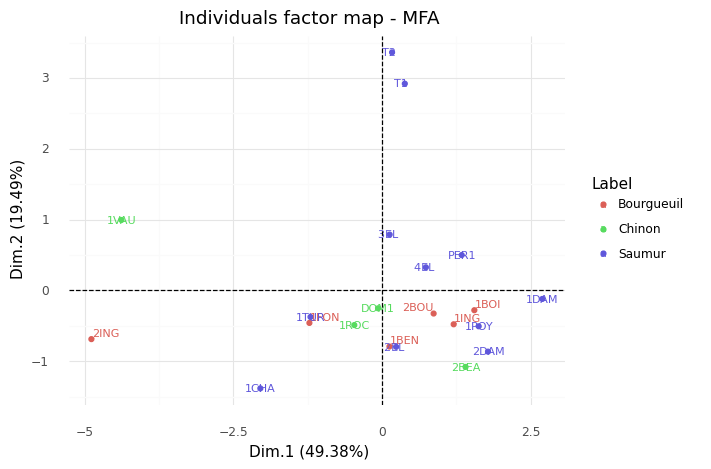

In [12]:
p = fviz_mfa_ind(res_mfa,habillage="Label",repel=True,ind_sup=False)
print(p)

### Color by numpy array

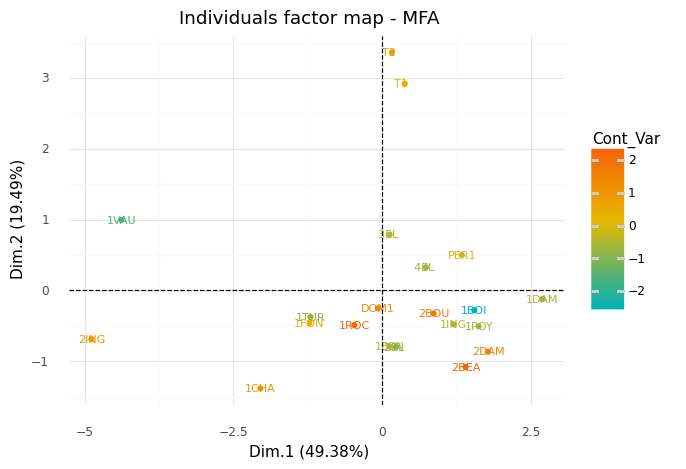

In [13]:
# Using  numpy color
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=wine.shape[0])
p = fviz_mfa_ind(res_mfa,color=color_numpy,quali_sup=False,ind_sup=False)
print(p)

### Color by kmeans

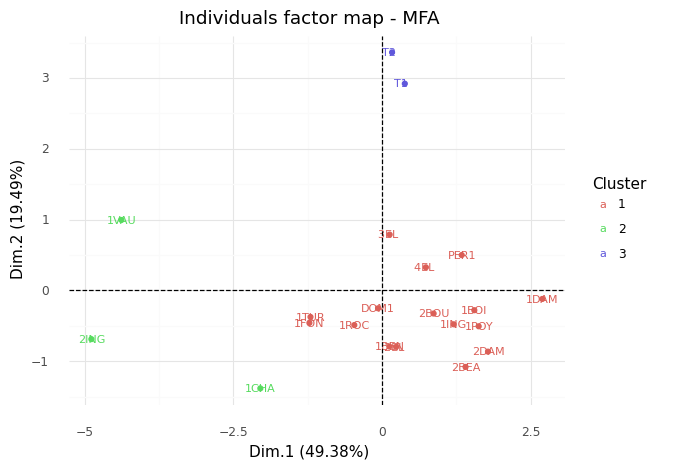

In [14]:
# Using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mfa.ind_["coord"])
p = fviz_mfa_ind(res_mfa,color=kmeans,repel=False,quali_sup=False,ind_sup=False)
print(p)

### Set limit

#### limit cos2

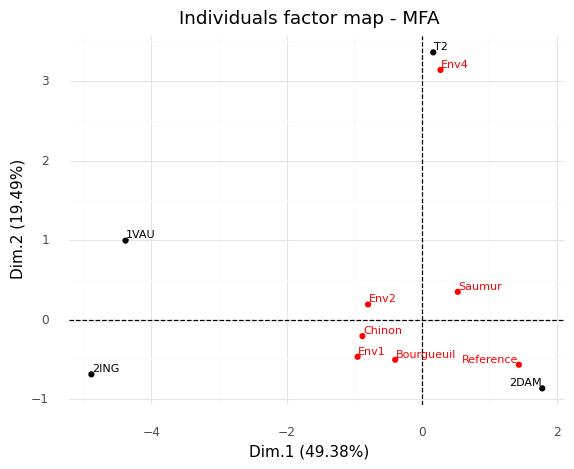

In [15]:
p = fviz_mfa_ind(res_mfa,lim_cos2=0.8,repel=True,ind_sup=False)
print(p)

#### limit contrib

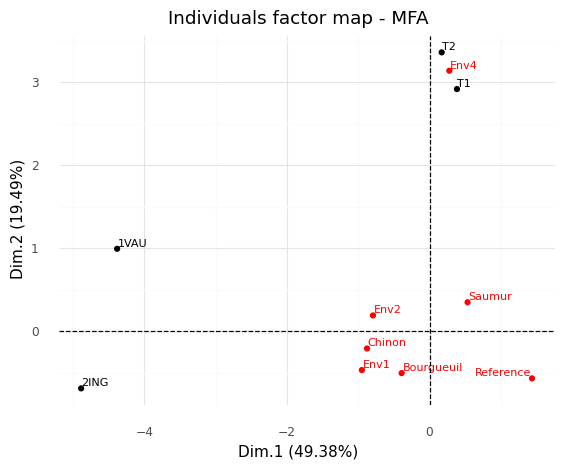

In [16]:
p = fviz_mfa_ind(res_mfa,lim_contrib=20,repel=True,ind_sup=False)
print(p)

## Variables Factor Map

### Color by RGB color

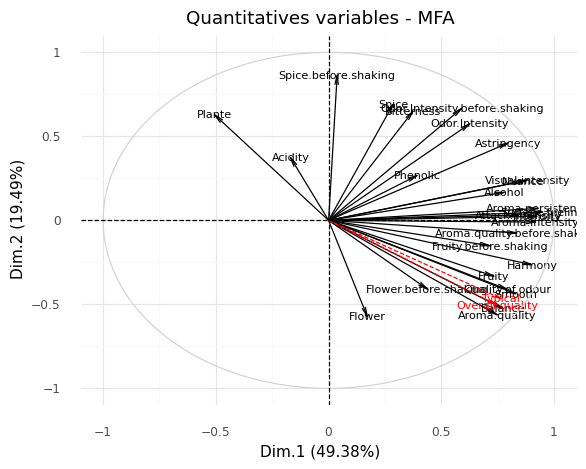

In [17]:
from scientisttools import fviz_mfa_var
p = fviz_mfa_var(res_mfa,color="black")
print(p)

### color by cos2

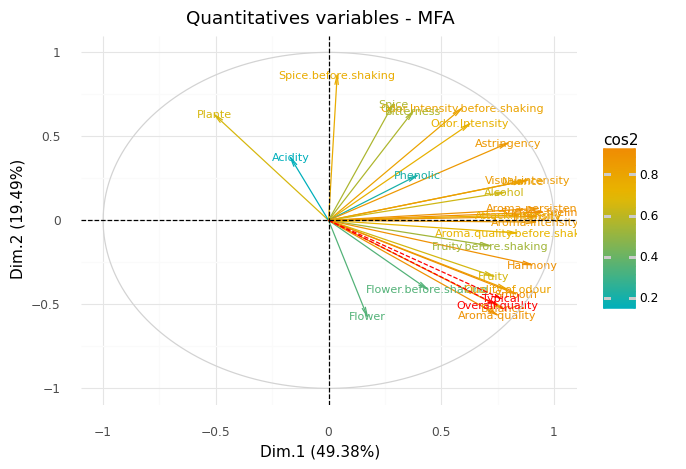

In [18]:
p = fviz_mfa_var(res_mfa,color="cos2")
print(p)

### Color by contrib

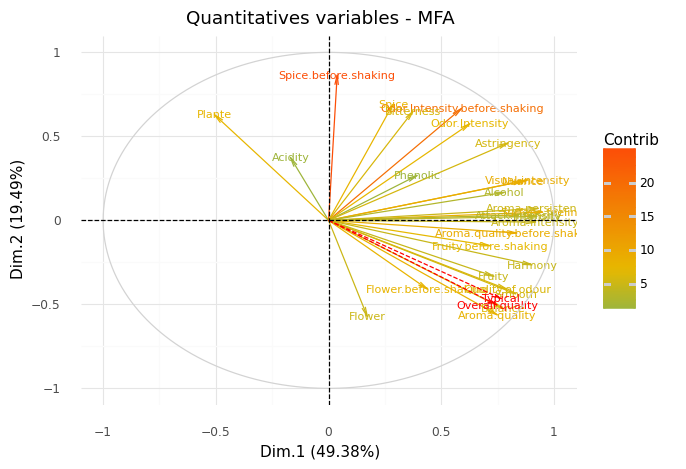

In [19]:
p = fviz_mfa_var(res_mfa,color="contrib")
print(p)

### Color by group

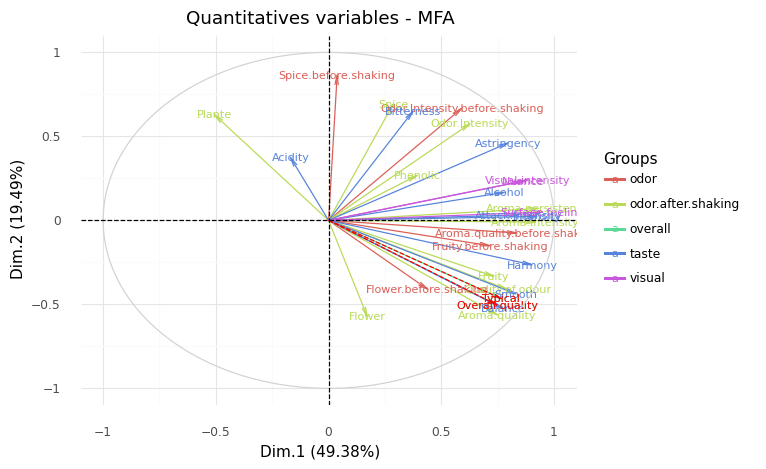

In [20]:
p = fviz_mfa_var(res_mfa)
print(p)

### Color by numpy array

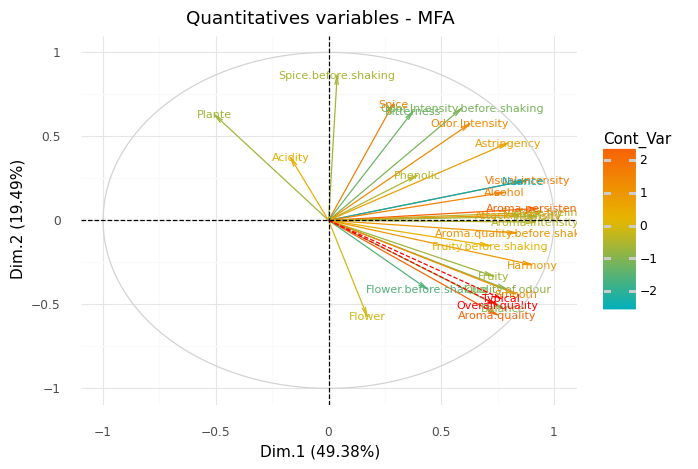

In [21]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_mfa.quanti_var_["coord"].shape[0])
p = fviz_mfa_var(res_mfa,color=color_numpy)
print(p)

### Color by kmeans

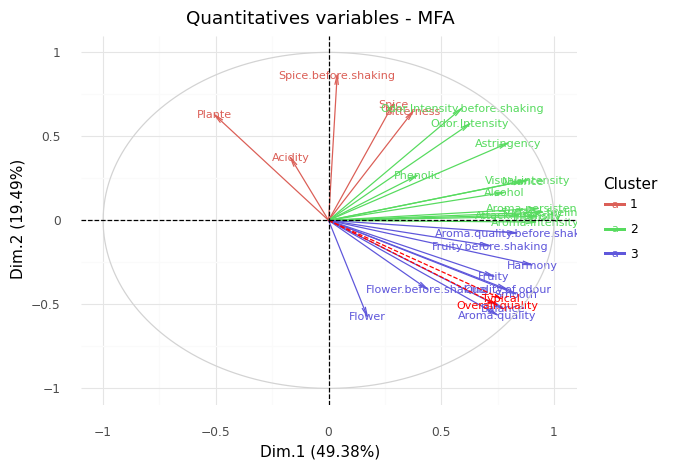

In [22]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mfa.quanti_var_["coord"])
p = fviz_mfa_var(res_mfa,color=kmeans)
print(p)

### Set limit

#### Limit cos2

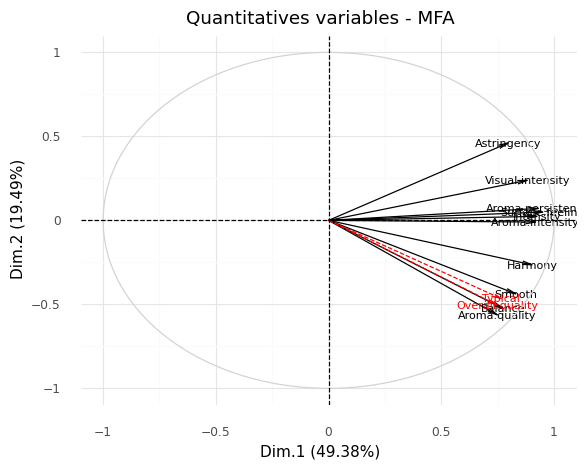

In [23]:
p = fviz_mfa_var(res_mfa,color="black",lim_cos2=0.8)
print(p)

#### Limit Contrib

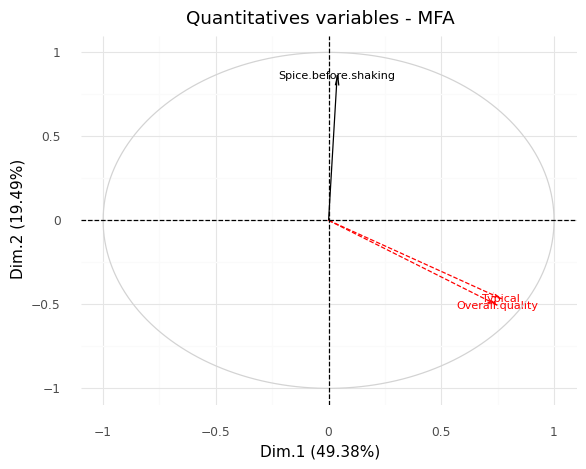

In [24]:
p = fviz_mfa_var(res_mfa,color="black",lim_contrib=20)
print(p)

## Variable groups

### Color by RGB color

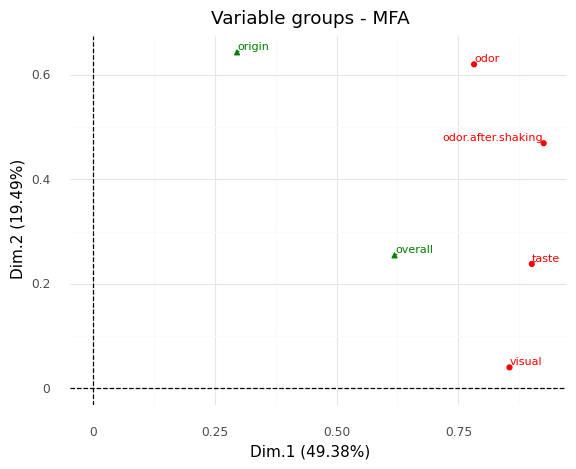

In [25]:
from scientisttools import fviz_mfa_group
p = fviz_mfa_group(res_mfa,repel=True)
print(p)

### Color by cos2

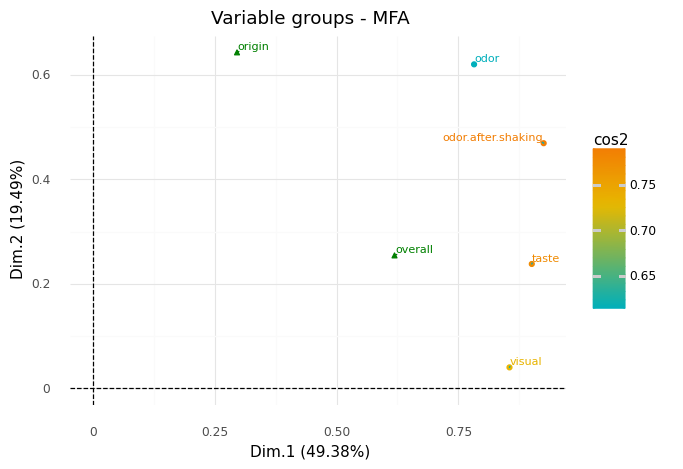

In [26]:
p = fviz_mfa_group(res_mfa,color="cos2",repel=True)
print(p)

### Color by contrib

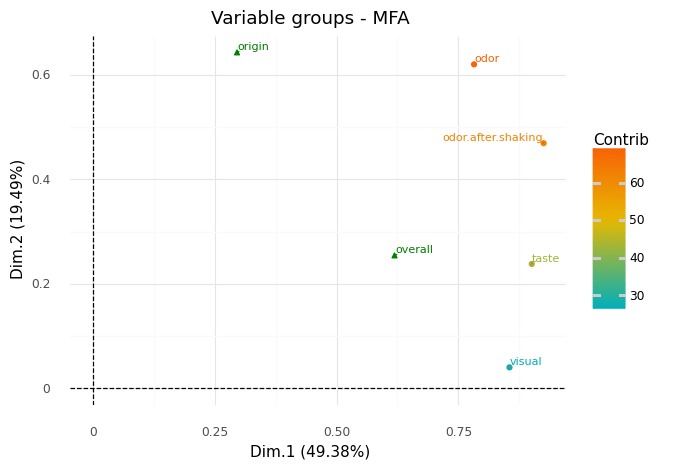

In [27]:
p = fviz_mfa_group(res_mfa,color="contrib",repel=True)
print(p)

### Color by numpy array

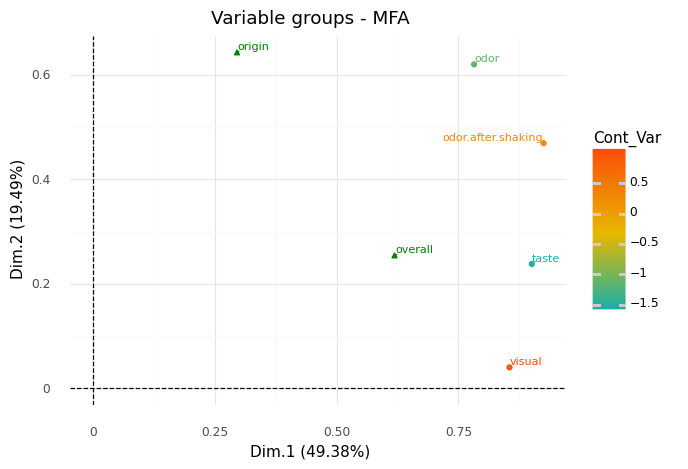

In [28]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_mfa.group_["coord"].shape[0])
p = fviz_mfa_group(res_mfa,color=color_numpy,repel=True)
print(p)

### Color by kmeans

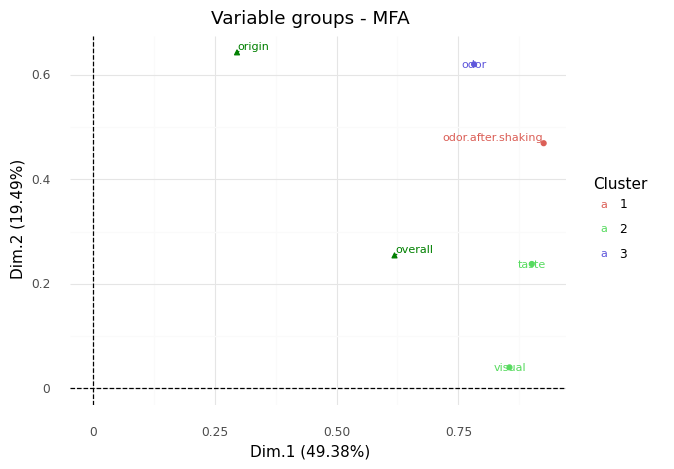

In [29]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mfa.group_["coord"])
p = fviz_mfa_group(res_mfa,color=kmeans,repel=True)
print(p)

### Set limit

#### limit cos2

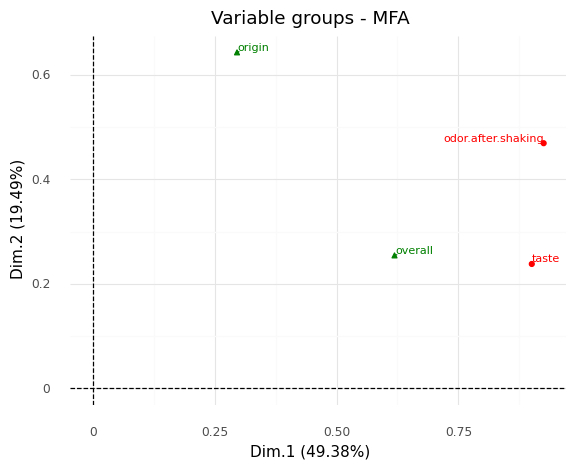

In [30]:
p = fviz_mfa_group(res_mfa,lim_cos2=0.75,repel=True)
print(p)

#### limit contrib

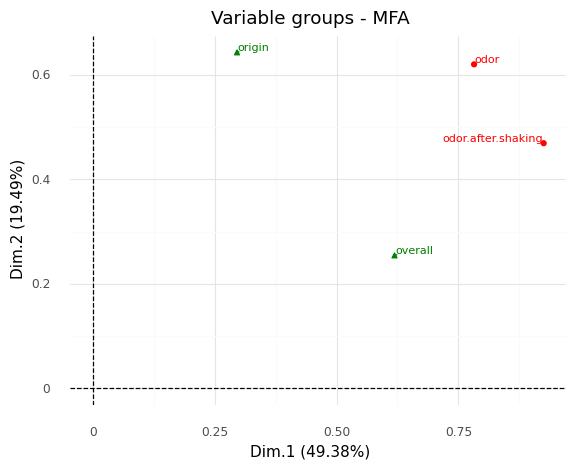

In [31]:
p = fviz_mfa_group(res_mfa,lim_contrib=50,repel=True)
print(p)

## Partial axes

### Color by RGB color

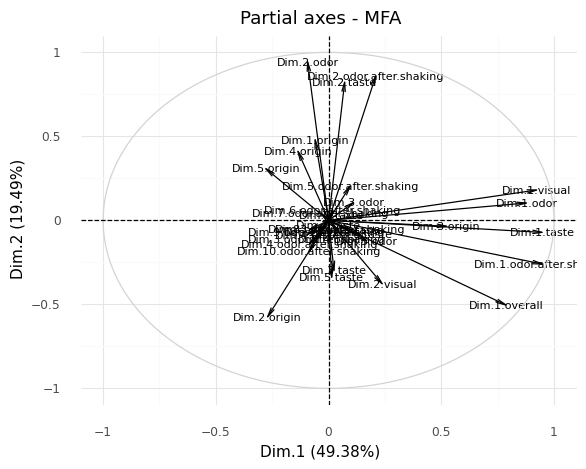

In [32]:
from scientisttools import fviz_mfa_axes
p = fviz_mfa_axes(res_mfa,color="black")
print(p)

### Color by group

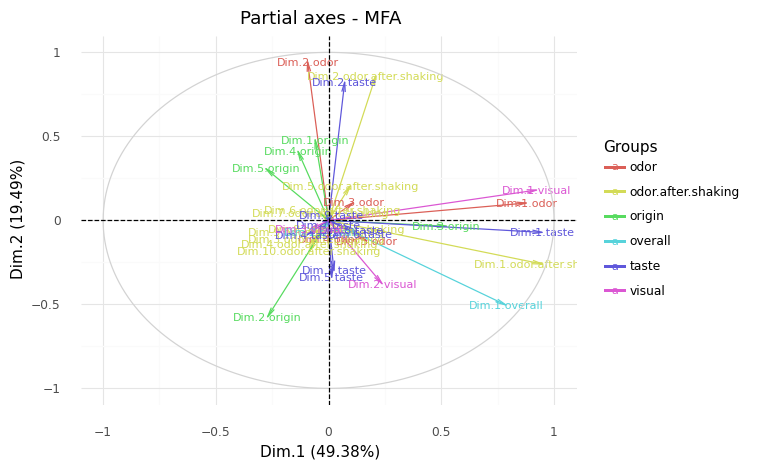

In [33]:
p = fviz_mfa_axes(res_mfa)
print(p)

## Plot contrib

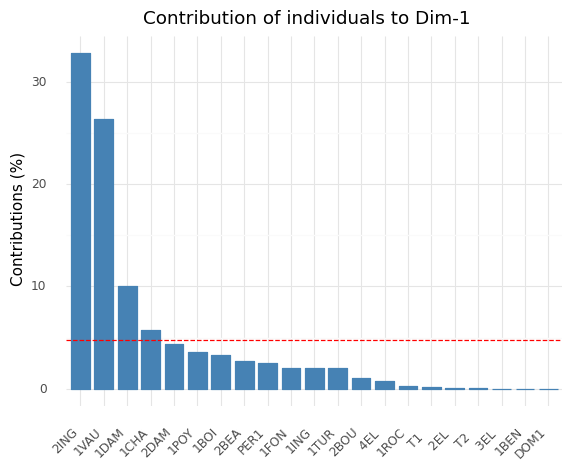

In [34]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_mfa,choice="ind")
print(p)

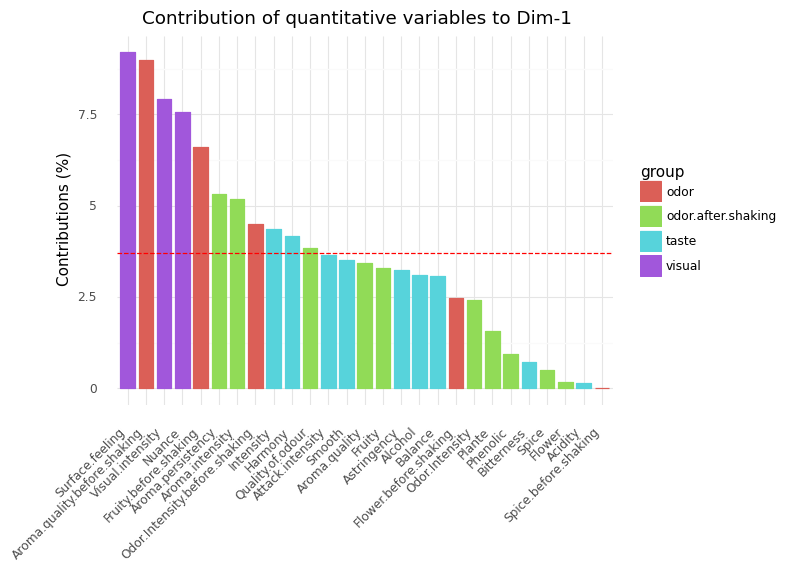

In [35]:
p = fviz_contrib(res_mfa,choice="quanti_var")
print(p)

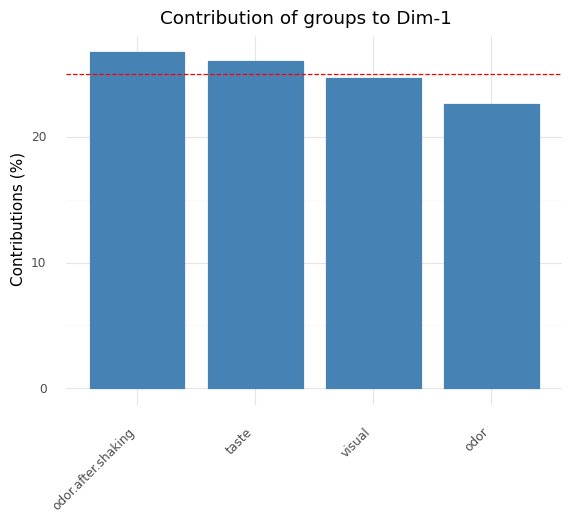

In [36]:
p = fviz_contrib(res_mfa,choice="group")
print(p)

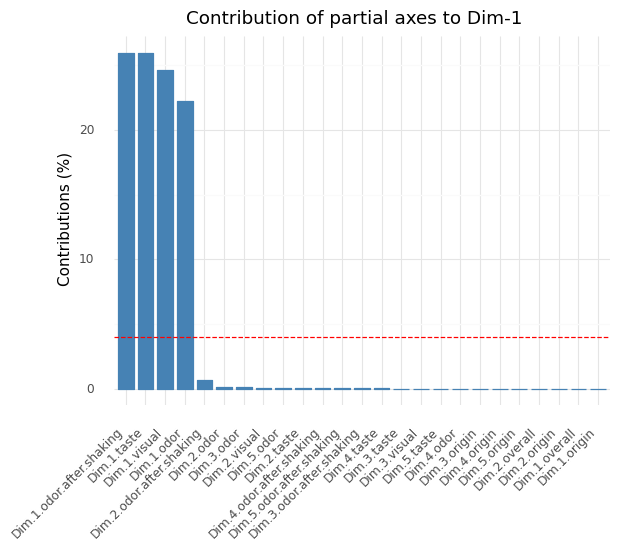

In [37]:
p = fviz_contrib(res_mfa,choice="partial_axes")
print(p)

## Plot cos2

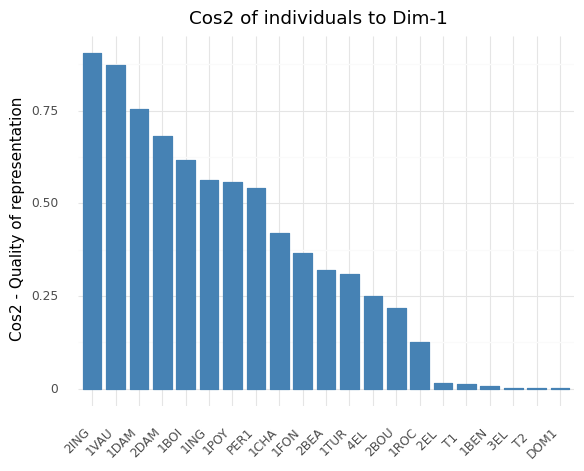

In [38]:
from scientisttools import fviz_cos2
p = fviz_cos2(res_mfa)
print(p)

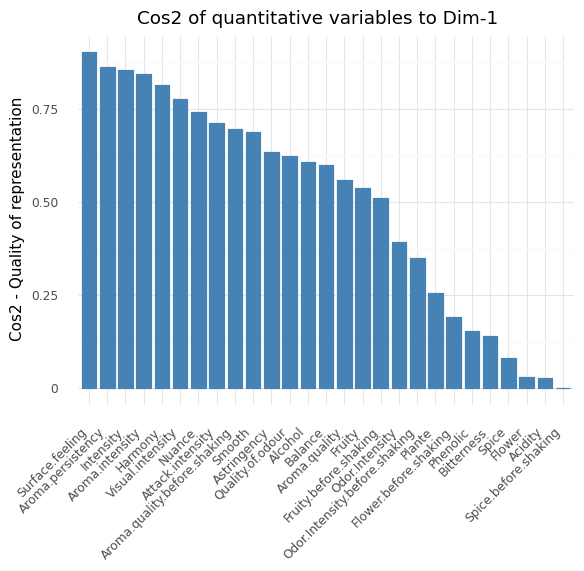

In [39]:
p = fviz_cos2(res_mfa,choice="quanti_var")
print(p)

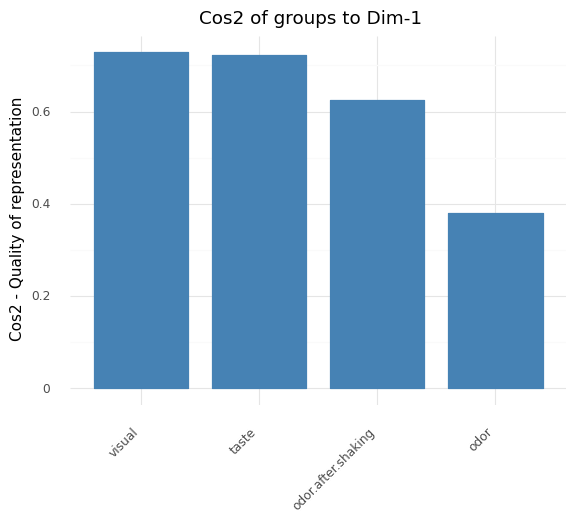

In [40]:
p = fviz_cos2(res_mfa,choice="group")
print(p)

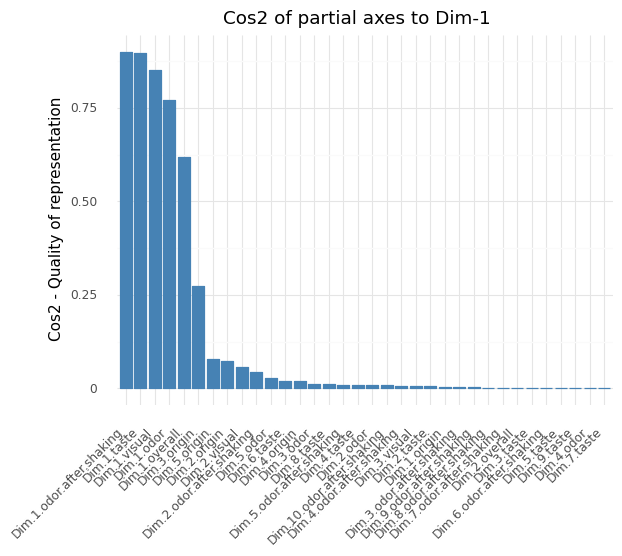

In [41]:
p = fviz_cos2(res_mfa,choice="partial_axes")
print(p)

## Corrcircle

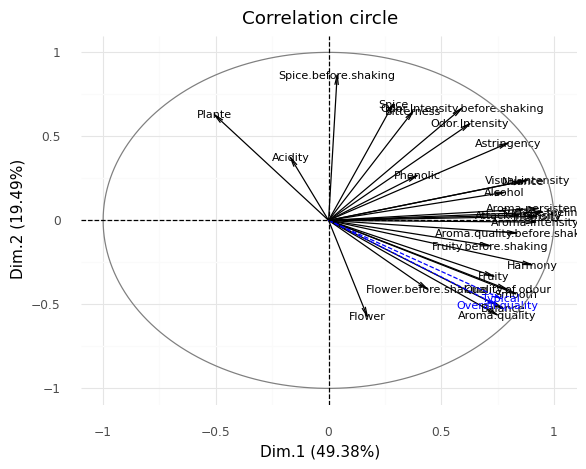

In [42]:
from scientisttools import fviz_corrcircle
p = fviz_corrcircle(res_mfa)
print(p)